# Dimensionality Reduction using TSNE

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

## Accessing dataset

In [2]:
X,y=fetch_openml('mnist_784',version=1,return_X_y=True)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [4]:
X.shape

(70000, 784)

In [5]:
X.iloc[1]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 1, Length: 784, dtype: float64

In [6]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

## Plotting the images

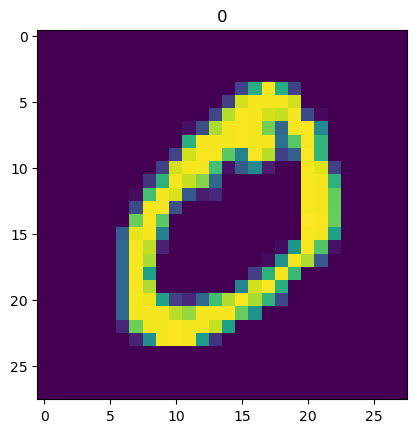

In [8]:
plt.imshow(X.iloc[1].to_numpy().reshape(28,28))
plt.title(y[1]);

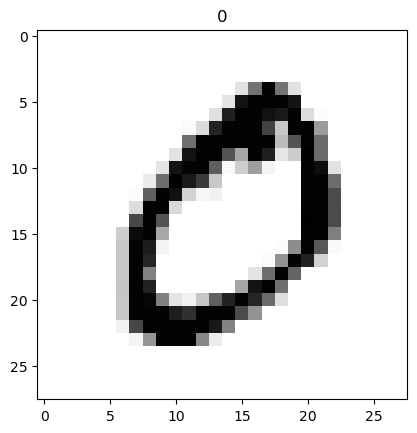

In [9]:
plt.imshow(X.iloc[1].to_numpy().reshape(28,28),'Greys')
plt.title(y[1]);

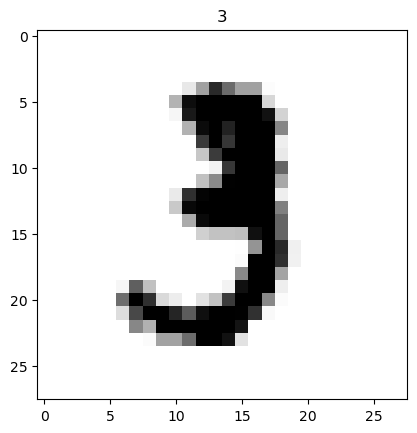

In [10]:
plt.imshow(X.iloc[10].to_numpy().reshape(28,28),'Greys')
plt.title(y[10]);

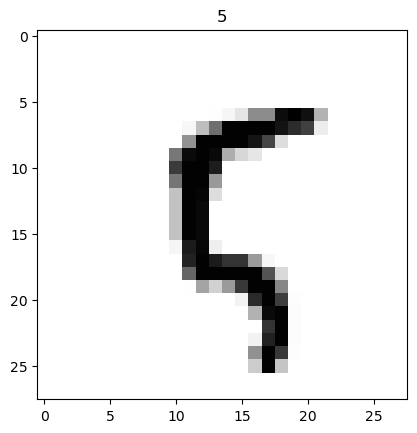

In [11]:
plt.imshow(X.iloc[100].to_numpy().reshape(28,28),'Greys')
plt.title(y[100]);

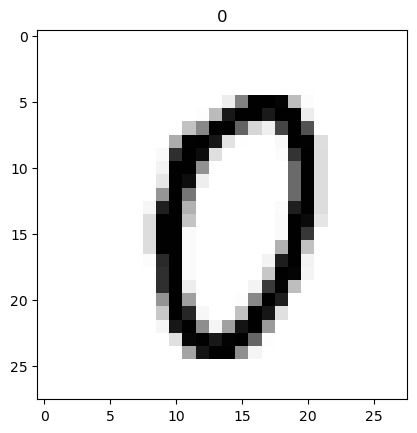

In [12]:
plt.imshow(X.iloc[1000].to_numpy().reshape(28,28),'Greys')
plt.title(y[1000]);

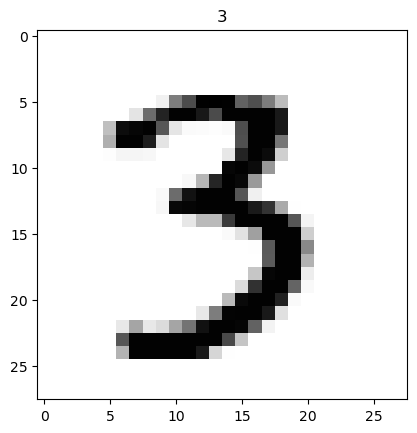

In [13]:
plt.imshow(X.iloc[10000].to_numpy().reshape(28,28),'Greys')
plt.title(y[10000]);

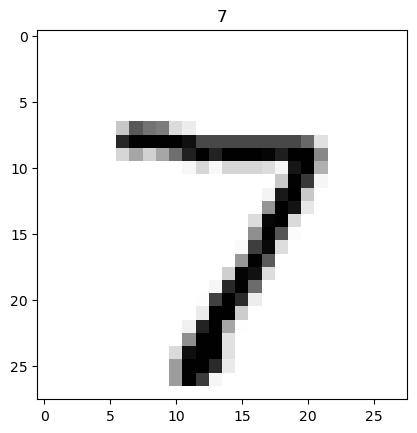

In [14]:
plt.imshow(X.iloc[60000].to_numpy().reshape(28,28),'Greys')
plt.title(y[60000]);

## Creating a subset of data

In [15]:
np.random.seed(10)
sample=np.random.choice(X.shape[0],1000)
print(sample)

[50496  9372 10201 37597 17904 16241 43002  9224  9289 55552 47475 53604
 49391 51595 67638 36184  7290 33342 32289 62664 25550 28749 12301  6899
 50558 36700  1366 61214  8281 31545 67364 49435 28178 59798 35422 43768
 20875 15434 22543 44496  5191 52568 30091 67217 66695 23243 25372 39713
 62932 51962 14808 16428 35461 38744  9580 47887 31576 51855 52221 66806
 19029 60054 39536 47836 57406 67062 24561 13903 51564  3626 19181 37611
 52018 51757 24229 17298 40720  1362 50255 56563 68661 13546 39697 28064
 23889  7913 30810 61708 26098 40145 35984 47232 37065 26560 39334 35582
 69216 44866 56415 69987 17490 52982 50765 49658 25973 22253 51185 28118
 36261 44811 21397 49112 53928 36197 28395 23176 24277 16796 66815  4973
 40478 13435 64977 21717 20414 21517 52905 60321 18948  6871 58718 41511
  4443 53351 37641 36611  6302 30150 50158 20856 35074 28609 59377 56294
 11754 57997  7088 12222 18218 12334 30624 34295 69982 58554 11640 47122
  1458 38444 14655 33643 68301 32274 18904 66663 62

In [16]:
X1=X.iloc[sample,:]
X1.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
50496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
y1=y[sample]
y1

50496    2
9372     9
10201    8
37597    5
17904    3
        ..
60429    8
2223     7
31023    8
41229    3
34443    2
Name: class, Length: 1000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Building the TSNE model

In [19]:
from sklearn.manifold importt TSNE


In [21]:
tsne=TSNE(n_components=2, perplexity=30,random_state=10)

X_tsne=tsne.fit_transform(X1)
X_tsne.shape

(1000, 2)

## Plotting the transformed points

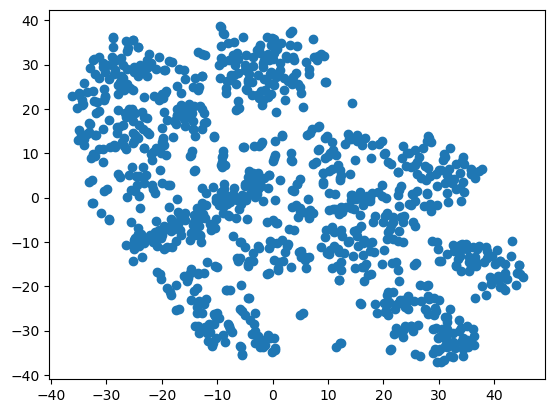

In [22]:
plt.scatter(X_tsne[:,0],X_tsne[:,1]);

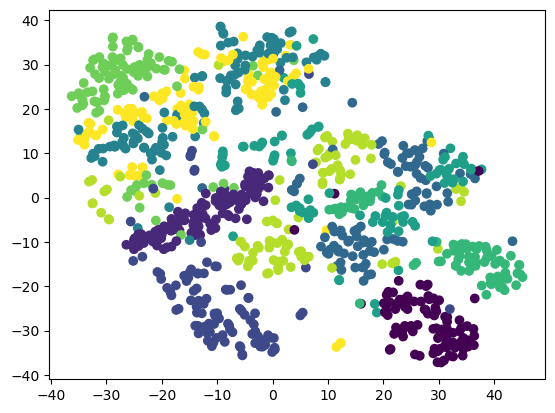

In [23]:
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y1.astype(float));

## Creating a DF for better visualisation

In [24]:
df= pd.DataFrame({'X0':X_tsne[:,0],'X1':X_tsne[:,1],'Label':y1})
df

,X0,X1,Label
50496,-10.006186,-26.074419,2
9372,9.717128,-7.369781,9
10201,-4.994249,-11.053277,8
37597,31.960960,4.174516,5
17904,29.573967,2.527816,3
...,...,...,...
60429,13.125174,12.058336,8
2223,-21.936703,30.303387,7
31023,0.041509,-5.146369,8
41229,22.559149,-9.783815,3


In [25]:
df['Label'].value_counts()

Label
4    112
1    111
9    107
3    103
8    101
2     99
7     97
0     93
5     92
6     85
Name: count, dtype: int64

<Figure size 1500x1200 with 0 Axes>

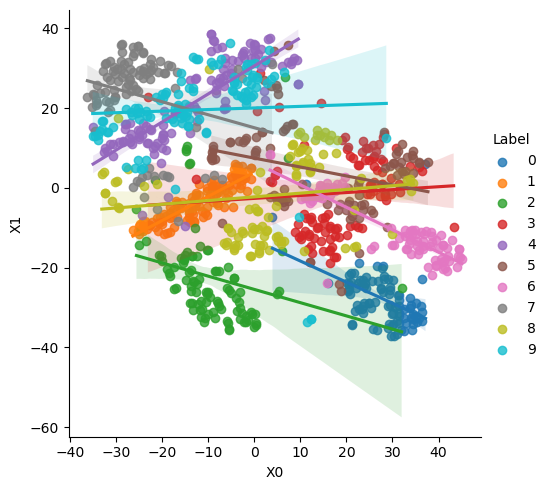

In [26]:
plt.figure(figsize=(15,12))
sns.lmplot(data=df,x='X0',y='X1',hue='Label');

<Figure size 1500x1200 with 0 Axes>

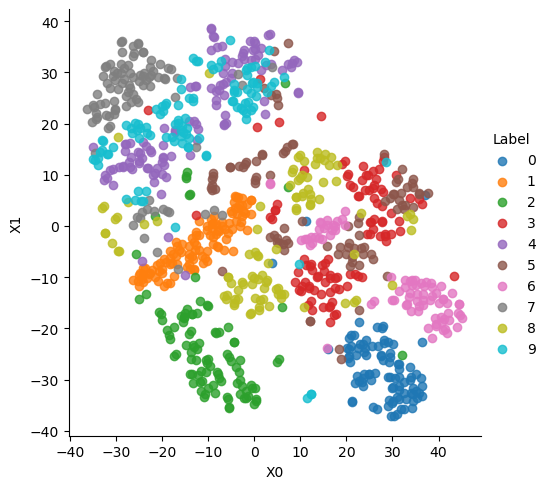

In [27]:
plt.figure(figsize=(15,12))
sns.lmplot(data=df,x='X0',y='X1',hue='Label',fit_reg=False);